We will be starting with the most basic and simplest algorithm today, that is Logistic Regression

<b>Logistic Regression</b>

Have you ever wondered whether to buy or not to buy an item? <br>
We often deal with the situations where we need to choose between different sets of things. For example, whether we want to buy something or not, is it going to be sunny, windy or rainy today? <br>
All these come under this classification where we predict, which set of a particular data point belongs to.

We generally use Logistic Regression when we gave to deal with the discrete values like "yes" or "no", "0" or "1" or like tossing a coin which would result in only two outcomes -"head" or "tails".<br>
It predicts the probability of the occurence of the event by fitting data into logit function.

In statistics, the logit function is a function associated with the standard logistic distribution. It has many uses in data analysis and machine learning, especially in data transformations.

Mathematically, the logit is the inverse of the standard logistic function. 

The logistic function is a sigmoid function (common S shaped curve)<br>
- Sigmoid Function is constrained by a pair of horizontal assimtotes as x tends to +∞(infinity) to -∞(infinity). <br>
- The curve is generally convex for values less than zero and concave for values more than zero. <br>
- Active region of a sigmoid is -5 to +5. <br>
- It is monotonic (a function varying in such a way that it either never decreases or never increases) and has first derivative which is bell-shaped. 

<img src="https://andymath.com/wp-content/uploads/2019/08/Logistic-Function.jpg">

In the above formula - if L=1, k=-1 and (x-x0)=0 then it is known as <b>Standard Logistic Function.</b>

So, the logit function is defined as : <br>
<img src="https://miro.medium.com/max/1400/1*UkAxAuEG8TkTlIl1buLY6A.png">

Because of this, the logit is also called the log-odds since it is equal to the logarithm of the odds ratio (p/1-p), where p is a probability.

In regression analysis, logistic regression is estimating the parameters of a logistic model. Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". <br>
The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names

<img src="https://miro.medium.com/max/1244/1*vEiAxU_mVmFIOvf-xzTolw.png">

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. Multinomial logistic regression can model scenarios where there are more than two possible discrete outcomes.

 The logistic function applies a sigmoid function to restrict the y value from a large scale to within the range 0–1.

It is used when our dependent variable is dichotomous or binary. It just means a variable that has only 2 outputs, for example, if a person will survive the accident or not, the student will pass this exam or not. The outcome can either be yes or no (2 outputs). This regression technique is similar to linear regression and can be used to predict the Probabilities for classification problems.

Now let's discuss the mathematics behind Logistic Regression

<img src="Page1.jpeg">
<img src="Page2.jpeg">
<img src="Page3.jpeg">

Let's now start with the code. We will also be starting with our first dataset.

It's a very simple dataset which consist of features like 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction' and 'Age'. Here we have our target feature as 'Outcome' which is having dicrete values like "0" and "1" where 0 means not having diabetes and 1 means having diabetes. Now we will try to predict whether a person has diabetes or not based on the features mentioned.

<b>Step 1 : Importing the libraries needed.</b>

In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

import warnings  #we generally do this step so that if we ever encounter any warning given by any algorithm it simply ignores it.
warnings.filterwarnings('ignore')

<b>Step 2 : Describing the columns of our dataset.</b>

In [2]:
col = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv("diabetes.csv", names = col, header = 1) #here we have used a variable df so as to store our csv file. Instead of reading the file again and again by using pandas we store that in a variable so that, whenever we need to use the dataframe we can use it by this variable.
df.head(n =10) #Here we are printing the first 10 entries of our dataset. Here "n" denotes the number of entries you want to fetch.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [3]:
df.tail(n=10) #This is similar to head but here we are printing the last 10 entries of our dataset. Here "n" denotes the number of entries you want to fetch.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
757,1,106,76,0,0,37.5,0.197,26,0
758,6,190,92,0,0,35.5,0.278,66,1
759,2,88,58,26,16,28.4,0.766,22,0
760,9,170,74,31,0,44.0,0.403,43,1
761,9,89,62,0,0,22.5,0.142,33,0
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1
766,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df.describe() #We are describing the dataset here.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<b>Step 3 : Represent your datatset graphically so that it would be easier to analyse. (The more you represent your datatset graphically, the more you will understand your dataset)</b>

<AxesSubplot:xlabel='Outcome', ylabel='count'>

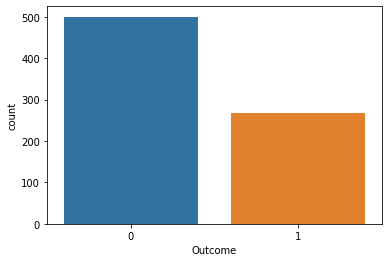

In [5]:
sns.countplot(x='Outcome',data=df) #Here, we plotted count plot so as to understand the data properly. We plotted the Outcome column.

<b>Step 4 : Finally defining your X(independent variables) and Y(dependent variable)</b>

In [6]:
X = df.drop('Outcome',axis=1) #All the features are our dependent variables here. Hence, instead of writing the names of all the features we generally write it like this. (taking all the features except outcome, that's why we are dropping that column)
y = df.Outcome #As Independent feature is Outcome.

<b>Step 5 : Splitting your dataset into training and testing set.</b>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state =42) #Since we have mentioned the test size here so the train size will automatically be taken as 1 - 0.15 = 0.85

Now you must be confused what is random_state and why have I used it?

Random state ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator,so that your train-test splits are always deterministic. If you don't set a seed, it is different each time. This ensures that the random numbers are generated in the same order. <br>
If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.<br>
However, if a fixed value is assigned like random_state = 0 or 1 or 42 or any other integer then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets. <br>
Since at every run, train data will change so the accuracy might change for every run. When the Random_state = " constant integer" is defined then train data will be constant for every run so that it will make easy to debug.<br>
I have used 42 as random_state, if we want we can choose other numbers as well because the act of setting the random_state parameter is more important than what number we set it to!

In [8]:
log_reg = LogisticRegression(solver='newton-cg',penalty='l2',random_state=101,C=1.0) #Here we are applying our algorithm.
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=101, solver='newton-cg')

While using Logistic Regression, I have used some parameters like – solver, penalty and C. Now, explaining these terms: Comparison of the sparsity (percentage of zero coefficients) of solutions when L1, L2 and Elastic-Net penalty are used for different values of C. We can see that large values of C give more freedom to the model. Conversely, smaller values of C constrain the model more. A high value of C tells the model to give high weight to the training data, and a lower weight to the complexity penalty. A low value tells the model to give more weight to this complexity penalty at the expense of fitting to the training data. <br>
L2 regularization adds an L2 penalty equal to the square of the magnitude of coefficients. L2 will not yield sparse models and all coefficients are shrunk by the same factor (none are eliminated). <br>
And the last parameter, which is solver=’newton-cg’, we used this solver because it supports the L2 regularization which we are using in penalty parameter.

Why have I used these parameters?<br>
Because in some cases they generally increase the accuracy of our model.

In [9]:
y_pred = log_reg.predict(X_test) #Here, we are predicting the values of our model

In [10]:
print("Accuracy is: ",accuracy_score(y_test, y_pred)) #This line tells us the accuracy of our model comparing the actual values (y_test) and predicated values by our model (y_pred)

Accuracy is:  0.8275862068965517


We completed our first algorithm today. <br>
Keep practising, download the datasets from kaggle and get started!